In [1]:
import pandas as pd
import numpy as np
import json
import gzip
import pickle
import re
from bs4 import BeautifulSoup
import unicodedata
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\RAM\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RAM\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\RAM\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [168]:
f1 = "/Users/RAM/Downloads/Electronics_5.json.gz"
f2 = "/Users/RAM/Downloads/meta_Electronics.json.gz"
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

In [ ]:
df = getDF(f1)
df.head()

In [ ]:
meta_data_df = getDF(f2)
meta_data_df.head()

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details
0,"[Electronics, Camera &amp; Photo, Video Survei...",,[The following camera brands and models have b...,,Genuine Geovision 1 Channel 3rd Party NVR IP S...,[],,GeoVision,"[Genuine Geovision 1 Channel NVR IP Software, ...","[>#3,092 in Tools &amp; Home Improvement &gt; ...",[],Camera &amp; Photo,,"January 28, 2014",$65.00,0011300000,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
1,"[Electronics, Camera &amp; Photo]",,[This second edition of the Handbook of Astron...,,"Books ""Handbook of Astronomical Image Processi...",[0999470906],,33 Books Co.,[Detailed chapters cover these fundamental top...,"[>#55,933 in Camera &amp; Photo (See Top 100 i...","[0943396670, 1138055360, 0999470906]",Camera &amp; Photo,,"June 17, 2003",,0043396828,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
2,"[Electronics, eBook Readers &amp; Accessories,...",,[A zesty tale. (Publishers Weekly)<br /><br />...,,One Hot Summer,"[0425167798, 039914157X]",,Visit Amazon's Carolina Garcia Aguilera Page,[],"3,105,177 in Books (",[],Books,,,$11.49,0060009810,[],[],NaN
3,"[Electronics, eBook Readers & Accessories, eBo...",,[],,Hurray for Hattie Rabbit: Story and pictures (...,"[0060219521, 0060219580, 0060219394]",,Visit Amazon's Dick Gackenbach Page,[],"2,024,298 in Books (","[0060219521, 0060219475, 0060219394]",Books,,,.a-section.a-spacing-mini{margin-bottom:6px!im...,0060219602,[],[],NaN
4,"[Electronics, eBook Readers & Accessories, eBo...",,[&#8220;sex.lies.murder.fame. is brillllli&#82...,,sex.lies.murder.fame.: A Novel,[],,Visit Amazon's Lolita Files Page,[],"3,778,828 in Books (",[],Books,,,$13.95,0060786817,[],[],NaN


In [ ]:
with open('/Users/RAM/Documents/reviews.pkl', 'wb') as f:
    pickle.dump(df, f)

In [ ]:
with open('/Users/RAM/Documents/meta_data.pkl', 'wb') as f:
    pickle.dump(meta_data_df, f)

In [ ]:
with open('/Users/RAM/Documents/meta_data.pkl', 'rb') as f:
    md = pickle.load(f)

In [ ]:
with open('/Users/RAM/Documents/reviews.pkl', 'rb') as f:
    rev = pickle.load(f)

In [ ]:
product = 'Video Games'
print('Total number of rows for the product.')
md['main_cat'].value_counts()[product]

Total number of rows for the product.


893

In [ ]:
# s = set(md['main_cat'])
# d = {}
# for i in s:
#     md_p = md[md['main_cat'] == i]
#     rev_p = rev[rev['asin'].isin(md_p['asin'])]
#     d[i] = len(rev_p)
# d['Portable Audio &amp; Accessories']

In [ ]:
rev.fillna("", inplace=True)
md.fillna("", inplace=True)

In [ ]:
rev = rev.map(lambda x: str(x) if isinstance(x, dict) else x)
md = md.map(lambda x: str(x) if isinstance(x, dict) else x)
rev = rev.map(lambda x: str(x) if isinstance(x, list) else x)
md = md.map(lambda x: str(x) if isinstance(x, list) else x)
rev.drop_duplicates(inplace=True)
md.drop_duplicates(inplace=True)

In [ ]:
md_pro = md[md['main_cat'] == product]
rev_pro = rev[rev['asin'].isin(md_pro['asin'])]

In [172]:
#yeah
# md_book = md[md['main_cat'] == 'Portable Audio &amp; Accessories']
# rev_book = rev[rev['asin'].isin(md_book['asin'])]
# rev_book.to_csv('file1.csv')
# len(rev_book)

In [ ]:
num_rev = len(rev_pro)
num_rev

11057

In [ ]:
avg_rating = rev_pro['overall'].mean()
print(f'{avg_rating:.4f}')

4.2253


In [171]:
num_un = rev_pro['asin'].nunique()
num_un

228

In [ ]:
num_good_ratings = len(rev_pro[rev_pro['overall'] >= 3])
num_good_ratings

9705

In [ ]:
num_bad_ratings = len(rev_pro[rev_pro['overall'] < 3])
num_bad_ratings

1352

In [ ]:
num_rev_per_rating = rev_pro['overall'].value_counts()
num_rev_per_rating

overall
5.0    6982
4.0    1785
3.0     938
1.0     849
2.0     503
Name: count, dtype: int64

In [ ]:
def preprocessing(rev_pros):
    rev_pros['reviewText'] = rev_pros['reviewText'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
    rev_pros['reviewText'] = rev_pros['reviewText'].apply(lambda x: unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore'))
    rev_pros['reviewText'] = rev_pros['reviewText'].apply(lambda x: re.sub(r'[^a-zA-Z0-9 ]', ' ', x))
    stop_words = set(stopwords.words('english'))
    rev_pros['reviewText'] = rev_pros['reviewText'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in stop_words]))
    lemmatizer = WordNetLemmatizer()
    rev_pros['reviewText'] = rev_pros['reviewText'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
    rev_pros['reviewText'] = rev_pros['reviewText'].apply(lambda x: x.lower())
    return rev_pros

In [ ]:
rev_pro = preprocessing(rev_pro)
rev_pro.head()

C:\Users\RAM\AppData\Local\Temp\ipykernel_3636\3120020086.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  rev_pros['reviewText'] = rev_pros['reviewText'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
C:\Users\RAM\AppData\Local\Temp\ipykernel_3636\3120020086.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rev_pros['reviewText'] = rev_pros['reviewText'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
C:\Users\RAM\AppData\Local\Temp\ipykernel_3636\3120020086.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
10032,1.0,,True,"09 4, 2008",A10RZ6MHQNTS93,B00000K13H,,Clint Notestine,i bought hoping play dreamcast without using r...,Didn't work,1220486400,
10033,5.0,,True,"02 7, 2014",A24OXZ8YRKN5I2,B00000K13H,,K. Sidhu,this awesome also svideo unlike original cable...,Awesome...,1391731200,
10034,1.0,,True,"03 5, 2013",AZRYVJJ69B01T,B00000K13H,,Masonic,did work waste money hopefully one else get su...,Not GOOD!!,1362441600,
10035,5.0,,True,"12 21, 2012",A1LUO9ZDG69BC4,B00000K13H,,Clifford L. Reihing,very nice good item i like work very nice good...,Very Nice - Good item - I Like it works just a...,1356048000,
10040,5.0,,True,"04 14, 2011",A2CT7APWRDIF9C,B00000K13H,,Beekman,i finally play dreamcast clear screen these ca...,Sweet cables dude!,1302739200,


In [ ]:
print(f"Number of Reviews: {num_rev}")
print(f"Average Rating Score: {avg_rating:.4f}")
print(f"Number of Unique Products: {num_unique}")
print(f"Number of Good Ratings: {num_good_ratings}")
print(f"Number of Bad Ratings: {num_bad_ratings}")
print(f"Number of Reviews corresponding to each Rating: {dict(num_rev_per_rating)}")
print(f"Sample of preprocessed text: {rev_pro['reviewText'].iloc[0]}")

Number of Reviews: 11057
Average Rating Score: 4.2253
Number of Unique Products: 228
Number of Good Ratings: 9705
Number of Bad Ratings: 1352
Number of Reviews corresponding to each Rating: {5.0: 6982, 4.0: 1785, 3.0: 938, 1.0: 849, 2.0: 503}
Sample of preprocessed text: i bought hoping play dreamcast without using rf connector came well cable even work


In [ ]:
top_20_brands = md_pro['brand'].value_counts().nlargest(20)
least_20_brands = md_pro['brand'].value_counts().nsmallest(20)

In [ ]:
merged_df = pd.merge(rev_pro, md_pro[['asin', 'brand']], on='asin', how='left')
dict1 = {}
for i in set(merged_df['brand']):
    mpr = merged_df[merged_df['brand'] == i]['overall'].mean()
    dict1[i] = mpr
res = max(dict1.items())
res

('sunvalleytek', 3.2)

In [ ]:
rev_pro['year'] = pd.to_datetime(rev_pro['reviewTime']).dt.year
rate_count = rev_pro.groupby('year')['overall'].count().sort_values(ascending=False).head(5)
rate_count = dict(rate_count)
rate_count_5Years = dict(sorted(rate_count.items()))
rate_count_5Years

C:\Users\RAM\AppData\Local\Temp\ipykernel_3636\562390540.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rev_pro['year'] = pd.to_datetime(rev_pro['reviewTime']).dt.year


{2013: 1703, 2014: 2074, 2015: 2332, 2016: 1981, 2017: 1373}

In [ ]:
max_rev_year = rev_pro['year'].value_counts().idxmax()
highest_custm_year = rev_pro.groupby('year')['reviewerID'].nunique().idxmax()

In [ ]:
# Top 20 most reviewed brands printed
print("Top 20 most reviewed brands:")
i = 0
for key, value in dict(top_20_brands).items():
    i += 1
    if key == '':
        key = "blank ''"
        print(f'{i}. {key} : {value}')
        continue
    print(f'{i}. {key[12:]} : {value}')

Top 20 most reviewed brands:
1. blank '' : 64
2. Gunnar Optiks : 22
3. Sony : 19
4. dreamGEAR : 17
5. Generic : 16
6. Masione : 16
7. Activision : 12
8. Mad Catz : 12
9. Microsoft : 11
10. KMD : 11
11. CTA Digital : 11
12.  : 10
13. Nyko : 9
14. TekNmotion : 9
15.  : 8
16. Canopy : 7
17. HDE : 7
18. Hyperkin : 7
19. INSTEN : 7
20. Importer520 : 7


In [ ]:
# Top 20 least reviewed brands printed
print("Top 20 least reviewed brands:")
i = 0
for key, value in dict(least_20_brands).items():
    i += 1
    if key[:2]=='by':
        print(f'{i}. {key[12:]} : {value}')
        continue
    print(f'{i}. {key} : {value}')

Top 20 least reviewed brands:
1. Beats by dre solo : 1
2. Razer : 1
3. Codemaster : 1
4. Bestipik : 1
5. G-Dreamer : 1
6. Tomee : 1
7. Oblanc : 1
8. Traveler's Choice : 1
9. Disney Infinity : 1
10. Performanced Designed Products LLC : 1
11. LASUS : 1
12. Assecure : 1
13. Accessory Genie : 1
14. Rapoo : 1
15. Lg : 1
16. Andoer : 1
17. Atlantic : 1
18. CWC-GROUP : 1
19. PWND Gear : 1
20. Xett Multimedia : 1


In [ ]:
print(f"Most positively reviewed {product}: {res}")
print(f"Count of ratings over 5 consecutive years: ")
print('Year'+'  '+'Count')
for i, j in rate_count_5Years.items():
    print(f'{i}  {j}')
print(f"Year the product got maximum reviews: {max_rev_year}")
print(f"Year with the highest number of Customers: {highest_custm_year}")

Most positively reviewed Video Games: ('sunvalleytek', 3.2)
Count of ratings over 5 consecutive years: 
Year  Count
2013  1703
2014  2074
2015  2332
2016  1981
2017  1373
Year the product got maximum reviews: 2015
Year with the highest number of Customers: 2015


In [ ]:
good_rev = rev_pro[rev_pro['overall'] >= 3]['reviewText']
bad_rev = rev_pro[rev_pro['overall'] < 3]['reviewText']

good_wc = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(good_rev))
bad_wc = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(bad_rev))

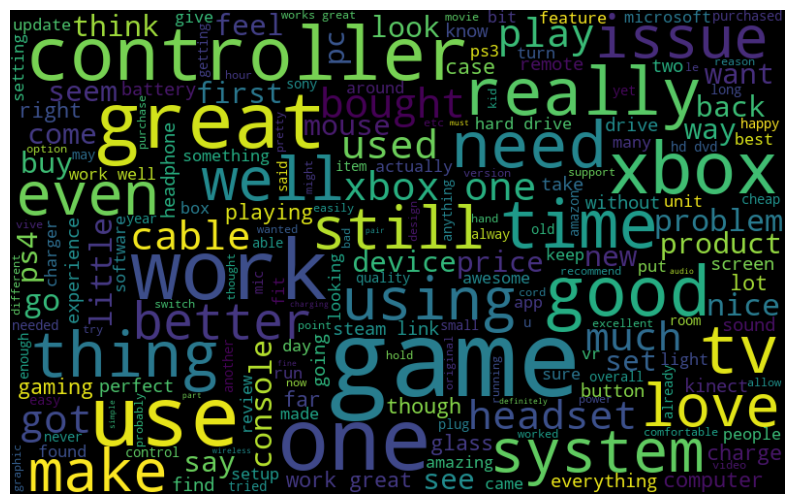

In [ ]:
plt.figure(figsize=(10, 7))
plt.imshow(good_wc, interpolation="bilinear")
plt.axis('off')
plt.show()

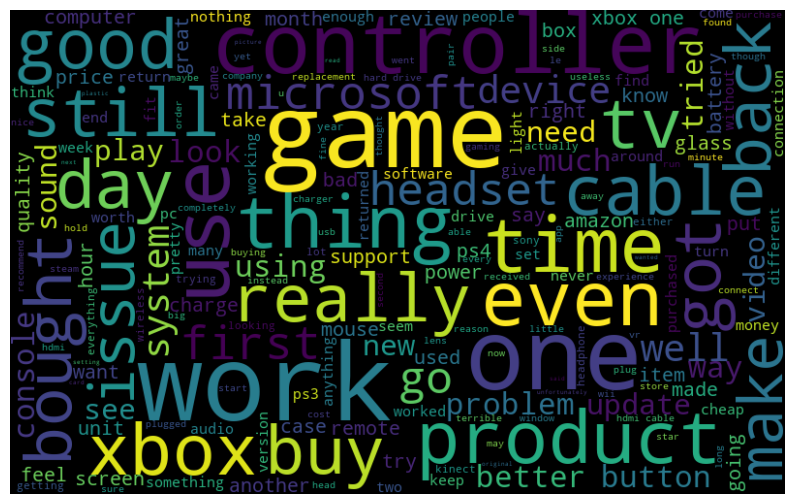

In [ ]:
plt.figure(figsize=(10, 7))
plt.imshow(bad_wc, interpolation="bilinear")
plt.axis('off')
plt.show()

**By observing the word cloud we can say that the most common good and bad word appears to be the same i.e. 'game' which can be seen largest in both the word clouds although 'work' also appears equally large in bad words.**

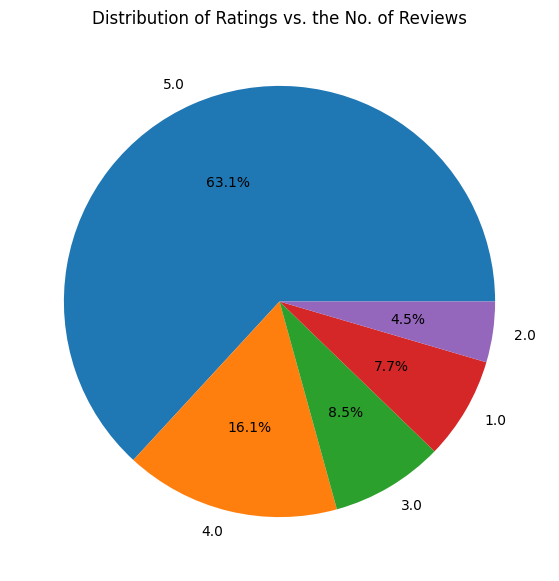

In [ ]:
plt.figure(figsize=(10,7))
plt.pie(num_rev_per_rating, labels=num_rev_per_rating.index, autopct='%1.1f%%')
plt.title('Distribution of Ratings vs. the No. of Reviews')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import KFold, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD

In [ ]:
def rate_class(r):
    if r < 3:
        return 'Bad'
    elif r > 3:
        return 'Good'
    else:
        return 'Average'

rev_pro['Rating'] =  rev_pro['overall'].apply(rate_class)
rev_pro.head()

C:\Users\RAM\AppData\Local\Temp\ipykernel_3636\3515520374.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rev_pro['Rating'] =  rev_pro['overall'].apply(rate_class)


,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image,year,Rating
10032,1.0,,True,"09 4, 2008",A10RZ6MHQNTS93,B00000K13H,,Clint Notestine,i bought hoping play dreamcast without using r...,Didn't work,1220486400,,2008,Bad
10033,5.0,,True,"02 7, 2014",A24OXZ8YRKN5I2,B00000K13H,,K. Sidhu,this awesome also svideo unlike original cable...,Awesome...,1391731200,,2014,Good
10034,1.0,,True,"03 5, 2013",AZRYVJJ69B01T,B00000K13H,,Masonic,did work waste money hopefully one else get su...,Not GOOD!!,1362441600,,2013,Bad
10035,5.0,,True,"12 21, 2012",A1LUO9ZDG69BC4,B00000K13H,,Clifford L. Reihing,very nice good item i like work very nice good...,Very Nice - Good item - I Like it works just a...,1356048000,,2012,Good
10040,5.0,,True,"04 14, 2011",A2CT7APWRDIF9C,B00000K13H,,Beekman,i finally play dreamcast clear screen these ca...,Sweet cables dude!,1302739200,,2011,Good


In [ ]:
rev_pro2 = rev_pro.copy()

data = rev_pro2['reviewText']

v = CountVectorizer()

X = v.fit_transform(data)

y = rev_pro2['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [ ]:
dt = DecisionTreeClassifier()
lr = LogisticRegression()
rf = RandomForestClassifier()
nb = MultinomialNB()
knn = KNeighborsClassifier()
svd = TruncatedSVD()

In [ ]:
# 1st model Decision Tree
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

     Average       0.15      0.15      0.15       231
         Bad       0.44      0.42      0.43       336
        Good       0.87      0.88      0.87      2198

    accuracy                           0.76      2765
   macro avg       0.49      0.48      0.48      2765
weighted avg       0.76      0.76      0.76      2765



In [ ]:
# 2nd model Logisitc Regression
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

     Average       0.28      0.17      0.21       231
         Bad       0.61      0.50      0.55       336
        Good       0.88      0.94      0.91      2198

    accuracy                           0.82      2765
   macro avg       0.59      0.54      0.56      2765
weighted avg       0.80      0.82      0.81      2765



In [ ]:
# 3rd model Multinomial Naive Bayes
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)

print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

     Average       0.24      0.04      0.07       231
         Bad       0.62      0.32      0.43       336
        Good       0.84      0.97      0.90      2198

    accuracy                           0.81      2765
   macro avg       0.56      0.44      0.46      2765
weighted avg       0.76      0.81      0.77      2765



In [ ]:
# 4th model Random Forest
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

     Average       0.27      0.01      0.02       231
         Bad       0.70      0.26      0.38       336
        Good       0.83      0.99      0.90      2198

    accuracy                           0.82      2765
   macro avg       0.60      0.42      0.44      2765
weighted avg       0.76      0.82      0.76      2765



In [ ]:
# 5th model K-Nearest Neighbours
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

     Average       0.19      0.03      0.06       231
         Bad       0.52      0.07      0.13       336
        Good       0.81      0.98      0.89      2198

    accuracy                           0.79      2765
   macro avg       0.50      0.36      0.36      2765
weighted avg       0.72      0.79      0.72      2765



In [170]:
# svd.fit(X_train, y_train)

# # y_pred_knn = svd.(X_test)
# print(svd.explained_variance_ratio_)

# print(classification_report(y_test, y_pred_knn))

In [ ]:
final_ratings_matrix = rev_pro2.pivot_table(index ='reviewerID', columns ='asin', values = 'overall').fillna(0)
print('Shape of final_ratings_matrix: ', final_ratings_matrix.shape)

given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
print('given_num_of_ratings = ', given_num_of_ratings)

possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
print('possible_num_of_ratings = ', possible_num_of_ratings)

density = (given_num_of_ratings/possible_num_of_ratings)
density *= 100
print ('density: {:4.2f}%'.format(density))

final_ratings_matrix.head()

Shape of final_ratings_matrix:  (10544, 228)
given_num_of_ratings =  11053
possible_num_of_ratings =  2404032
density: 0.46%


asin,B00000K13H,B00000K4LZ,B00005B4Q7,B00005QI2R,B0001H9L3O,B00069BV5I,B0007PB0C0,B0009BB644,B0009PSFA8,B000B6MLRS,...,B014S0DVDK,B0159EEP7K,B015MPGNS0,B016XBGWAQ,B019O0JMOQ,B01D2SSDMI,B01GHFC08G,B01GTL4YKK,B01GTTKRNK,B01HI9ODP8
reviewerID,,,,,,,,,,,,,,,,,,,,,
A0110255Y4ER0RTKEKXS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0266076X6KPZ6CCHGVS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A02836981FYG9912C66F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
A0380485C177Q6QQNJIX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0669952LITT8YSA4Y83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
final_ratings_matrix.head()

asin,B00000K13H,B00000K4LZ,B00005B4Q7,B00005QI2R,B0001H9L3O,B00069BV5I,B0007PB0C0,B0009BB644,B0009PSFA8,B000B6MLRS,...,B014S0DVDK,B0159EEP7K,B015MPGNS0,B016XBGWAQ,B019O0JMOQ,B01D2SSDMI,B01GHFC08G,B01GTL4YKK,B01GTTKRNK,B01HI9ODP8
reviewerID,,,,,,,,,,,,,,,,,,,,,
A0110255Y4ER0RTKEKXS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0266076X6KPZ6CCHGVS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A02836981FYG9912C66F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
A0380485C177Q6QQNJIX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0669952LITT8YSA4Y83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
final_ratings_matrix['user_index'] = np.arange(0, final_ratings_matrix.shape[0])
final_ratings_matrix.set_index(['user_index'], inplace=True)

final_ratings_matrix.head()

asin,B00000K13H,B00000K4LZ,B00005B4Q7,B00005QI2R,B0001H9L3O,B00069BV5I,B0007PB0C0,B0009BB644,B0009PSFA8,B000B6MLRS,...,B014S0DVDK,B0159EEP7K,B015MPGNS0,B016XBGWAQ,B019O0JMOQ,B01D2SSDMI,B01GHFC08G,B01GTL4YKK,B01GTTKRNK,B01HI9ODP8
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
rating_matrix = rev_pro2.pivot_table(index='reviewerID', columns='asin', values='overall')

rating_matrix = (rating_matrix - rating_matrix.min()) / (rating_matrix.max() - rating_matrix.min())

mae_user_user = []
mae_item_item = []

def calculate_mae(rating_matrix, n_similar):
    similarity_matrix = cosine_similarity(rating_matrix.fillna(0))
    
    top_N_similar = np.argsort(similarity_matrix, axis=1)[:, -n_similar:]
    
    kf = KFold(n_splits=5)
    mae_values = []
    for train_index, test_index in kf.split(rating_matrix):
        train, test = rating_matrix.iloc[train_index], rating_matrix.iloc[test_index]
        
        predicted = np.array([
            np.mean(train.values[row, top_N_similar[row]]) for row in range(train.shape[0])
        ])
        
        mae = mean_absolute_error(test.values, predicted)
        mae_values.append(mae)
    
    return np.mean(mae_values)

for N in [10, 20, 30, 40, 50]:
    mae_user_user.append(calculate_mae(rating_matrix, N))

rating_matrix_T = rating_matrix.T
for N in [10, 20, 30, 40, 50]:
    mae_item_item.append(calculate_mae(rating_matrix_T, N))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot([10, 20, 30, 40, 50], mae_user_user, marker='o')
plt.title('User-User Recommender System')
plt.xlabel('K')
plt.ylabel('MAE')

plt.subplot(1, 2, 2)
plt.plot([10, 20, 30, 40, 50], mae_item_item, marker='o')
plt.title('Item-Item Recommender System')
plt.xlabel('K')
plt.ylabel('MAE')

In [ ]:
# old code
# merged_df1 = pd.merge(merged_df, md_pro[['asin', 'title']], on='asin', how='left')
# df_reviews = merged_df1.groupby(['reviewerName', 'asin'])['overall'].mean().reset_index()
# matrix = df_reviews.pivot(index='reviewerName', columns='asin', values='overall')
# scaler = MinMaxScaler()
# ms = scaler.fit_transform(matrix)
# ms1 = np.nan_to_num(ms)
# sim = cosine_similarity(ms1)
# sim_df = pd.DataFrame(sim, index=matrix.index, columns=matrix.index)
# sim_df
# matrix.fillna(0)

In [ ]:
df = sim_df.copy()
np.fill_diagonal(df.values, -np.inf)
top_10 = df.apply(lambda x: np.argsort(x)[-10:], axis=1)
top_10 = top_10.apply(lambda x: df.columns[x])
top_10.head()

In [ ]:
top_20 = df.apply(lambda x: np.argsort(x)[-20:], axis=1)
top_20 = top_20.apply(lambda x: df.columns[x])
top_20.head()

In [ ]:
top_30 = df.apply(lambda x: np.argsort(x)[-30:], axis=1)
top_30 = top_30.apply(lambda x: df.columns[x])
top_30.head()

In [ ]:
top_40 = df.apply(lambda x: np.argsort(x)[-40:], axis=1)
top_40 = top_40.apply(lambda x: df.columns[x])
top_40.head()

In [ ]:
top_50 = df.apply(lambda x: np.argsort(x)[-50:], axis=1)
top_50 = top_50.apply(lambda x: df.columns[x])
top_50.head()

In [ ]:
inp = input('Enter user: ')
if inp in top_10.index:
    print(top_10.loc[inp])

In [ ]:
# new code below
rev_pro2

In [268]:
top_10_products = df_reviews.groupby('title')['overall'].sum().sort_values(ascending=False).head(10)
top_10_products

title
Cocoweb PortBlock Dual-Function Door Security Bar    571.000000
Country Heaven (Dare River)                          374.466667
Mighty Bright XtraFlex Book Light, Silver            280.000000
Nightfall                                            212.000000
 Sting/On A Winters Night (0602527171494)            200.000000
My MacBook                                           174.000000
Iclicker+ Student Remote                             164.333333
Vintage Camera Photo Album                           159.000000
Indelible : A Novel                                  127.500000
Nikon D90 Inbrief Laminated Reference Card           109.000000
Name: overall, dtype: float64